In [1]:
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\patto\AppData\Local\Temp\ipykernel_31084\1505719282.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [21]:
file_path = 'sample/sample_04.txt'

IndexError: list index out of range

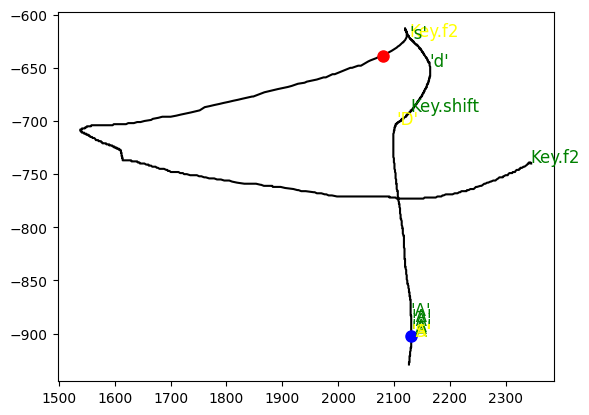

In [36]:
# Initialize lists to store data
x_coords = [] # Store mouse trajectory
y_coords = [] # Store mouse trajectory
x_coords_mouse = [] # Store mouse click
y_coords_mouse = [] # Store mouse click
pressed_or_released_mouse = [] 

x_coords_key = [] # Store key press
y_coords_key = [] # Store key press
key_pressed = []
pressed_or_released_key = []

last_mouse_x = None
last_mouse_y = None

with open(file_path, 'r') as file:
    for line in file:
        parts = line.strip().split(',')
        if parts[0] == "mouse" and len(parts) == 4:  # Ensure the line has at least four columns
            x, y = parts[1:3]  # Extract the x and y coordinates
            x_coords.append(int(x))
            y_coords.append(int(y))
            last_mouse_x = int(x)
            last_mouse_y = int(y)
            
        elif parts[0] == "mouse":
            x, y = parts[1:3]
            x_coords_mouse.append(int(x))
            y_coords_mouse.append(int(y))
            pressed_or_released_mouse.append(parts[4])
        elif parts[0] == "key":
            key_pressed.append(parts[1])
            pressed_or_released_key.append(parts[2])
            # Use the last recorded mouse position for the key press event
            if last_mouse_x is not None and last_mouse_y is not None:
                x_coords_key.append(last_mouse_x)
                y_coords_key.append(last_mouse_y)            

# Invert the y-coordinates to match the screen coordinates
if y_coords_key:
    y_coords_key = [-y for y in y_coords_key]
if y_coords_mouse:
    y_coords_mouse = [-y for y in y_coords_mouse]
if y_coords:
    y_coords = [-y for y in y_coords]

plt.plot(x_coords, y_coords, 'k-')
for i in range(len(x_coords_mouse)):
    if pressed_or_released_mouse[i] == 'pressed':
        plt.plot(x_coords_mouse[i], y_coords_mouse[i], 'ro', markersize=8)  # 'ro' for red circle marker
    else:
        plt.plot(x_coords_mouse[i], y_coords_mouse[i], 'bo', markersize=8)  # 'bo' for blue circle marker
for i in range(len(key_pressed)):
    if pressed_or_released_key[i] == 'pressed':
        plt.text(x_coords_key[i], y_coords_key[i], key_pressed[i], fontsize=12, color='green')
    else:
        plt.text(x_coords_key[i], y_coords_key[i], key_pressed[i], fontsize=12, color='yellow')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Mouse Coordinates with Pressed/Released Events')
plt.grid(True)
plt.show()